In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os, json

In [2]:
def load_result(path):
	'''
		path : path to experiment directory; expects `rollout.json` to be in directory
	'''
	#path = os.path.join(path, "0")
	# fullpath = os.path.join(path, 'rollout.json')
	fullpath = path
	suffix = path.split('/')[-1]

	if not os.path.exists(fullpath):
		return None, None

	results = json.load(open(fullpath, 'rb'))
	score = results['score']
	info = dict(returns=results["return"],
				first_value=results["first_value"],
				first_search_value=results["first_search_value"],
                discount_return=results["discount_return"],
				prediction_error=results["prediction_error"],
				step=results["step"])

	return score * 100, info
# Step 1: Find all rollout.json files
rollout_files = glob.glob('logs/*/*/*/rollout.json')

import pandas as pd
rows = []

# Step 2: Iterate over each file path
for file_path in rollout_files:
    # Split the path into parts
    parts = file_path.split('/')
    
    # Step 3: Extract parts of the path
    dataset = parts[1]
    exp_name = parts[2].rsplit('-', 1)[0]  # Remove the seed part
    seed = parts[2].split('-')[-1]  # Get the seed part
    rollout_time = int(parts[3])
    
    scores, infos = load_result(file_path)
    # Step 4: Print or store the parsed information
    # print(f'Dataset: {dataset}, ExpName: {exp_name}, Seed: {seed}, Rollout Time: {rollout_time}')
    # print(f'Scores: {scores}, Infos: {infos}')
    
    new_row = {'dataset': dataset, 'exp_name': exp_name, 'seed': seed, 'rollout_time': rollout_time, 'scores': scores, **infos}
    rows.append(new_row)
    
    # # Create a new row for the result in the dataframe
    # result_df = result_df.concat({'Dataset': dataset, 'Scores': scores, 'Mean': mean, 'Error': err, 'Returns': infos['returns'], 'First Value': infos['first_value'], 'First Search Value': infos['first_search_value'], 'Step': infos['step'], 'Prediction Error': infos['prediction_error'], 'Discount Return': infos['discount_return']}, ignore_index=True)

df = pd.DataFrame(rows, index=None)

In [3]:
def sort_and_clean(df: pd.DataFrame) -> pd.DataFrame:
    df = df[df['exp_name'] != 'debug']
    df = df[~df['exp_name'].str.contains('test')]
    df = df.sort_values(by=['dataset','exp_name', 'seed', 'rollout_time'])
    df.reset_index(drop=True, inplace=True)
    return df
df = sort_and_clean(df)

In [4]:

df_other = pd.read_csv('dataframe_other.csv')
df = pd.concat([df, df_other], axis=0)
df = sort_and_clean(df)

In [5]:
df.groupby(['dataset', 'exp_name', 'seed'])['scores'].describe()

count        mean        std  \
dataset                   exp_name       seed                                 
antmaze-large-diverse-v0  baseline       1      20.0   55.000000  51.041779   
                                         2      20.0   70.000000  47.016235   
                                         3      20.0   85.000000  36.634755   
                                         4      20.0   80.000000  41.039134   
                                         5      20.0   50.000000  51.298918   
...                                              ...         ...        ...   
pen-expert-v0             lfq_K512_zdim9 3      20.0  109.273148  41.419091   
                                         4      20.0  118.452998  57.861168   
                                         5      20.0  125.981205  47.454196   
walker2d-medium-expert-v2 baseline       1      20.0  109.282002   0.457002   
walker2d-medium-replay-v2 baseline       1      20.0   48.189139  36.987402   

                                                      min         25%  \
dataset                   exp_name       seed                           
antmaze-large-diverse-v0  baseline       1       0.000000    0.000000   
                                         2       0.000000    0.000000   
                                         3       0.000000  100.000000   
                                         4       0.000000  100.000000   
                                         5       0.000000    0.000000   
...                                                   ...         ...   
pen-expert-v0             lfq_K512_zdim9 3      22.451882   85.575798   
                                         4      -1.497376   89.214464   
                                         5       8.616200  112.701964   
walker2d-medium-expert-v2 baseline       1     108.294436  109.045059   
walker2d-medium-replay-v2 baseline       1       4.011836   10.144715   

                                                      50%         75%  \
dataset                   exp_name       seed                           
antmaze-large-diverse-v0  baseline       1     100.000000  100.000000   
                                         2     100.000000  100.000000   
                                         3     100.000000  100.000000   
                                         4     100.000000  100.000000   
                                         5      50.000000  100.000000   
...                                                   ...         ...   
pen-expert-v0             lfq_K512_zdim9 3     121.390340  137.169314   
                                         4     129.212354  169.245521   
                                         5     136.887378  159.032235   
walker2d-medium-expert-v2 baseline       1     109.367219  109.525370   
walker2d-medium-replay-v2 baseline       1      56.663545   81.815790   

                                                      max  
dataset                   exp_name       seed              
antmaze-large-diverse-v0  baseline       1     100.000000  
                                         2     100.000000  
                                         3     100.000000  
                                         4     100.000000  
                                         5     100.000000  
...                                                   ...  
pen-expert-v0             lfq_K512_zdim9 3     167.594228  
                                         4     171.946539  
                                         5     173.664952  
walker2d-medium-expert-v2 baseline       1     110.346749  
walker2d-medium-replay-v2 baseline       1      97.422963  

[133 rows x 8 columns]

In [6]:
df.groupby(['dataset', 'exp_name'])[['scores','prediction_error']].describe()

scores              \
                                                    count        mean   
dataset                   exp_name                                      
antmaze-large-diverse-v0  baseline                  100.0   68.000000   
                          lfq_K16384_zdim14          80.0   61.250000   
                          lfq_K16384_zdim14_wt      100.0   64.000000   
                          lfq_K16384_zdim14_wt_tf   100.0   70.000000   
                          lfq_K2pow16_zdim16_wt_tf  100.0   63.000000   
                          lfq_K4096_zdim12_wt_tf    100.0   50.000000   
                          lfq_K8192_zdim13          100.0   64.000000   
                          lfq_K8192_zdim13_wt       100.0   70.000000   
                          lfq_bl                    100.0   64.000000   
hopper-medium-expert-v2   baseline                  100.0   89.617331   
                          lfq_K1024_zdim10           60.0  105.857104   
                          lfq_K1024_zdim10_wt_tf    100.0  102.601642   
                          lfq_K4096_zdim12_wt_tf    100.0   99.294781   
                          lfq_K512_zdim9            100.0  103.501662   
                          lfq_K512_zdim9_wt         100.0  107.640300   
hopper-medium-replay-v2   baseline                  100.0   95.555359   
                          lfq_K512_zdim9_wt         100.0   88.513516   
                          lfq_bl                    100.0   72.090307   
pen-cloned-v0             baseline                  100.0   49.624067   
                          lfq_K1024_zdim10_wt_tf    100.0   38.104390   
                          lfq_K4096_zdim12_wt_tf    100.0   40.727937   
                          lfq_K512_zdim9            100.0   28.170425   
pen-expert-v0             baseline                  100.0  122.385599   
                          lfq_K1024_zdim10          100.0  111.752936   
                          lfq_K1024_zdim10_wt_tf    100.0  128.760522   
                          lfq_K4096_zdim12           80.0  106.138292   
                          lfq_K512_zdim9            100.0  124.104619   
walker2d-medium-expert-v2 baseline                   20.0  109.282002   
walker2d-medium-replay-v2 baseline                   20.0   48.189139   

                                                                           \
                                                          std         min   
dataset                   exp_name                                          
antmaze-large-diverse-v0  baseline                  46.882617    0.000000   
                          lfq_K16384_zdim14         49.025310    0.000000   
                          lfq_K16384_zdim14_wt      48.241815    0.000000   
                          lfq_K16384_zdim14_wt_tf   46.056619    0.000000   
                          lfq_K2pow16_zdim16_wt_tf  48.523659    0.000000   
                          lfq_K4096_zdim12_wt_tf    50.251891    0.000000   
                          lfq_K8192_zdim13          48.241815    0.000000   
                          lfq_K8192_zdim13_wt       46.056619    0.000000   
                          lfq_bl                    48.241815    0.000000   
hopper-medium-expert-v2   baseline                  36.432045    2.174049   
                          lfq_K1024_zdim10          17.371017   43.307926   
                          lfq_K1024_zdim10_wt_tf    20.264105   39.353805   
                          lfq_K4096_zdim12_wt_tf    21.160636   39.884108   
                          lfq_K512_zdim9            19.819505   39.472576   
                          lfq_K512_zdim9_wt         14.725688   44.956488   
hopper-medium-replay-v2   baseline                  11.013023   49.781208   
                          lfq_K512_zdim9_wt         22.334536    9.827933   
                          lfq_bl                    27.322944   17.309202   
pen-cloned-v0             baseline                  59.930725   -5.725618   
                    

In [7]:
df.groupby(['dataset', 'exp_name'])[['prediction_error']].describe()

prediction_error            \
                                                              count      mean   
dataset                   exp_name                                              
antmaze-large-diverse-v0  baseline                            100.0  0.429677   
                          lfq_K16384_zdim14                    80.0  0.621327   
                          lfq_K16384_zdim14_wt                100.0  0.529180   
                          lfq_K16384_zdim14_wt_tf             100.0  0.369920   
                          lfq_K2pow16_zdim16_wt_tf            100.0  0.674648   
                          lfq_K4096_zdim12_wt_tf              100.0  0.471413   
                          lfq_K8192_zdim13                    100.0  0.398395   
                          lfq_K8192_zdim13_wt                 100.0  0.442262   
                          lfq_bl                              100.0  0.710066   
hopper-medium-expert-v2   baseline                            100.0  0.079926   
                          lfq_K1024_zdim10                     60.0  0.039454   
                          lfq_K1024_zdim10_wt_tf              100.0  0.053382   
                          lfq_K4096_zdim12_wt_tf              100.0  0.121118   
                          lfq_K512_zdim9                      100.0  0.065455   
                          lfq_K512_zdim9_wt                   100.0  0.048774   
hopper-medium-replay-v2   baseline                            100.0  0.073886   
                          lfq_K512_zdim9_wt                   100.0  0.093076   
                          lfq_bl                              100.0  0.091858   
pen-cloned-v0             baseline                            100.0  0.230457   
                          lfq_K1024_zdim10_wt_tf              100.0  0.191588   
                          lfq_K4096_zdim12_wt_tf              100.0  0.187408   
                          lfq_K512_zdim9                      100.0  0.163474   
pen-expert-v0             baseline                            100.0  0.175783   
                          lfq_K1024_zdim10                    100.0  0.087790   
                          lfq_K1024_zdim10_wt_tf              100.0  0.103357   
                          lfq_K4096_zdim12                     80.0  0.099232   
                          lfq_K512_zdim9                      100.0  0.097741   
walker2d-medium-expert-v2 baseline                             20.0  0.151573   
walker2d-medium-replay-v2 baseline                             20.0  2.944257   

                                                                        \
                                                         std       min   
dataset                   exp_name                                       
antmaze-large-diverse-v0  baseline                  0.558358  0.059718   
                          lfq_K16384_zdim14         1.659200  0.069479   
                          lfq_K16384_zdim14_wt      0.891579  0.062068   
                          lfq_K16384_zdim14_wt_tf   0.147524  0.080767   
                          lfq_K2pow16_zdim16_wt_tf  1.573862  0.068652   
                          lfq_K4096_zdim12_wt_tf    1.014392  0.069660   
                          lfq_K8192_zdim13          0.204531  0.051616   
                          lfq_K8192_zdim13_wt       0.489466  0.089790   
                          lfq_bl                    1.864000  0.072175   
hopper-medium-expert-v2   baseline                  0.156423  0.010178   
                          lfq_K1024_zdim10          0.030840  0.017319   
                          lfq_K1024_zdim10_wt_tf    0.069939  0.014286   
                          lfq_K4096_zdim12_wt_tf    0.252552  0.010593   
                          lfq_K512_zdim9            0.137751  0.014867   
                          lfq_K512_zdim9_wt         0.048359  0.017218   
hopper-medium-replay-v2   baseline                  0.076586  0.016357   
                          lfq_K512_zdim9_wt         

In [8]:
def compare_basline(df):
    filtered_df = df[df['exp_name'].isin(['baseline', 'lfq_K512_zdim9', 'lfq_bl'])]
    f = filtered_df.groupby(['dataset', 'exp_name'])[['scores','prediction_error']].agg(['mean', 'std'])
    return f

compare_bl_df = compare_basline(df)
compare_bl_df

scores             \
                                                mean        std   
dataset                   exp_name                                
antmaze-large-diverse-v0  baseline         68.000000  46.882617   
                          lfq_bl           64.000000  48.241815   
hopper-medium-expert-v2   baseline         89.617331  36.432045   
                          lfq_K512_zdim9  103.501662  19.819505   
hopper-medium-replay-v2   baseline         95.555359  11.013023   
                          lfq_bl           72.090307  27.322944   
pen-cloned-v0             baseline         49.624067  59.930725   
                          lfq_K512_zdim9   28.170425  48.501003   
pen-expert-v0             baseline        122.385599  49.798465   
                          lfq_K512_zdim9  124.104619  45.938886   
walker2d-medium-expert-v2 baseline        109.282002   0.457002   
walker2d-medium-replay-v2 baseline         48.189139  36.987402   

                                         prediction_error            
                                                     mean       std  
dataset                   exp_name                                   
antmaze-large-diverse-v0  baseline               0.429677  0.558358  
                          lfq_bl                 0.710066  1.864000  
hopper-medium-expert-v2   baseline               0.079926  0.156423  
                          lfq_K512_zdim9         0.065455  0.137751  
hopper-medium-replay-v2   baseline               0.073886  0.076586  
                          lfq_bl                 0.091858  0.175823  
pen-cloned-v0             baseline               0.230457  0.171346  
                          lfq_K512_zdim9         0.163474  0.094251  
pen-expert-v0             baseline               0.175783  0.162866  
                          lfq_K512_zdim9         0.097741  0.053554  
walker2d-medium-expert-v2 baseline               0.151573  0.071986  
walker2d-medium-replay-v2 baseline               2.944257  1.708905

In [9]:
print(compare_bl_df.round(3).to_latex(float_format="%.3f"))

\begin{tabular}{llrrrr}
\toprule
 &  & \multicolumn{2}{r}{scores} & \multicolumn{2}{r}{prediction_error} \\
 &  & mean & std & mean & std \\
dataset & exp_name &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{antmaze-large-diverse-v0} & baseline & 68.000 & 46.883 & 0.430 & 0.558 \\
 & lfq_bl & 64.000 & 48.242 & 0.710 & 1.864 \\
\cline{1-6}
\multirow[t]{2}{*}{hopper-medium-expert-v2} & baseline & 89.617 & 36.432 & 0.080 & 0.156 \\
 & lfq_K512_zdim9 & 103.502 & 19.820 & 0.065 & 0.138 \\
\cline{1-6}
\multirow[t]{2}{*}{hopper-medium-replay-v2} & baseline & 95.555 & 11.013 & 0.074 & 0.077 \\
 & lfq_bl & 72.090 & 27.323 & 0.092 & 0.176 \\
\cline{1-6}
\multirow[t]{2}{*}{pen-cloned-v0} & baseline & 49.624 & 59.931 & 0.230 & 0.171 \\
 & lfq_K512_zdim9 & 28.170 & 48.501 & 0.163 & 0.094 \\
\cline{1-6}
\multirow[t]{2}{*}{pen-expert-v0} & baseline & 122.386 & 49.798 & 0.176 & 0.163 \\
 & lfq_K512_zdim9 & 124.105 & 45.939 & 0.098 & 0.054 \\
\cline{1-6}
walker2d-medium-expert-v2 & baseline & 109.282 & 0.45

In [10]:
df.groupby(['dataset', 'exp_name', 'seed'])['scores'].describe()

count        mean        std  \
dataset                   exp_name       seed                                 
antmaze-large-diverse-v0  baseline       1      20.0   55.000000  51.041779   
                                         2      20.0   70.000000  47.016235   
                                         3      20.0   85.000000  36.634755   
                                         4      20.0   80.000000  41.039134   
                                         5      20.0   50.000000  51.298918   
...                                              ...         ...        ...   
pen-expert-v0             lfq_K512_zdim9 3      20.0  109.273148  41.419091   
                                         4      20.0  118.452998  57.861168   
                                         5      20.0  125.981205  47.454196   
walker2d-medium-expert-v2 baseline       1      20.0  109.282002   0.457002   
walker2d-medium-replay-v2 baseline       1      20.0   48.189139  36.987402   

                                                      min         25%  \
dataset                   exp_name       seed                           
antmaze-large-diverse-v0  baseline       1       0.000000    0.000000   
                                         2       0.000000    0.000000   
                                         3       0.000000  100.000000   
                                         4       0.000000  100.000000   
                                         5       0.000000    0.000000   
...                                                   ...         ...   
pen-expert-v0             lfq_K512_zdim9 3      22.451882   85.575798   
                                         4      -1.497376   89.214464   
                                         5       8.616200  112.701964   
walker2d-medium-expert-v2 baseline       1     108.294436  109.045059   
walker2d-medium-replay-v2 baseline       1       4.011836   10.144715   

                                                      50%         75%  \
dataset                   exp_name       seed                           
antmaze-large-diverse-v0  baseline       1     100.000000  100.000000   
                                         2     100.000000  100.000000   
                                         3     100.000000  100.000000   
                                         4     100.000000  100.000000   
                                         5      50.000000  100.000000   
...                                                   ...         ...   
pen-expert-v0             lfq_K512_zdim9 3     121.390340  137.169314   
                                         4     129.212354  169.245521   
                                         5     136.887378  159.032235   
walker2d-medium-expert-v2 baseline       1     109.367219  109.525370   
walker2d-medium-replay-v2 baseline       1      56.663545   81.815790   

                                                      max  
dataset                   exp_name       seed              
antmaze-large-diverse-v0  baseline       1     100.000000  
                                         2     100.000000  
                                         3     100.000000  
                                         4     100.000000  
                                         5     100.000000  
...                                                   ...  
pen-expert-v0             lfq_K512_zdim9 3     167.594228  
                                         4     171.946539  
                                         5     173.664952  
walker2d-medium-expert-v2 baseline       1     110.346749  
walker2d-medium-replay-v2 baseline       1      97.422963  

[133 rows x 8 columns]

In [11]:
import re

# Define a function to apply to the column
def process_df(entry):
    # Apply your logic here
    # if entry != 'baseline' or entry != 'lfq_bl':
    if entry['exp_name'] != 'baseline' and entry['exp_name'] != 'lfq_bl':
        k_value = re.search(r'K(\d+)', entry['exp_name'])
        k_value = int(k_value.group(1)) if k_value else None
        
        if 'pow' in entry:
            k_value = re.search(r'K(\d+)pow(\d+)', entry['exp_name'])
            k_value = int(k_value.group(1))**int(k_value.group(2)) if k_value else None
        
        # Extract 'zdim' value
        zdim_value = re.search(r'zdim(\d+)', entry['exp_name'])
        zdim_value = int(zdim_value.group(1)) if zdim_value else None
        
        # Check for 'wt' and 'tf'
        wt_present = 'wt' in entry['exp_name']
        tf_present = 'tf' in entry['exp_name']
    
    else:
        dataset = entry['dataset'].split('-')[0]
        if dataset == 'antmaze':
            k_value = 8194
            zdim_value = 512
        else:
            k_value = 512
            zdim_value = 512
        tf_present = False
        wt_present = False
    # print(k_value, zdim_value, wt_present,entry['exp_name'])
    
    return k_value, zdim_value, wt_present, tf_present
        
    


# Apply the function to the column and store the result in a new column
# df['codebook'], df['dimension'], df['wt'], df['tf'] = df['exp_name'].apply(process_df).apply(df)
# Apply the function to the column and store the result in a temporary column
# df['temp'] = df['exp_name'].apply(process_df)
r = df.apply(process_df,axis=1)

df[['codebook', 'dimension', 'wt', 'tf']] = pd.DataFrame(r.tolist(), index=df.index)



# Drop the temporary column
# df.drop('temp', axis=1, inplace=True)
df

,dataset,exp_name,seed,rollout_time,scores,returns,first_value,first_search_value,discount_return,prediction_error,step,codebook,dimension,wt,tf
0,antmaze-large-diverse-v0,baseline,1,1,100.000000,1.000000,0.249966,0.433419,0.451674,0.370878,397,8194,512,False,False
1,antmaze-large-diverse-v0,baseline,1,2,100.000000,1.000000,0.225197,0.404380,0.323315,0.396940,564,8194,512,False,False
2,antmaze-large-diverse-v0,baseline,1,3,0.000000,0.000000,0.237857,0.487385,0.000000,0.202476,999,8194,512,False,False
3,antmaze-large-diverse-v0,baseline,1,4,0.000000,0.000000,0.249910,0.371267,0.000000,0.177252,999,8194,512,False,False
4,antmaze-large-diverse-v0,baseline,1,5,0.000000,0.000000,0.255804,0.353303,0.000000,0.355612,999,8194,512,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,walker2d-medium-replay-v2,baseline,1,16,59.850741,2749.179612,205.792130,317.812012,290.163517,3.833220,613,512,512,False,False
2656,walker2d-medium-replay-v2,baseline,1,17,58.422448,2683.611383,207.191193,304.432922,301.196380,1.947941,606,512,512,False,False
2657,walker2d-medium-replay-v2,baseline,1,18,5.544818,256.173369,204.287491,306.244995,140.026663,8.285329,102,512,512,False,False
2658,walker2d-medium-replay-v2,baseline,1,19,10.943173,503.994074,206.443802,308.205139,202.375177,1.885510,159,512,512,False,False


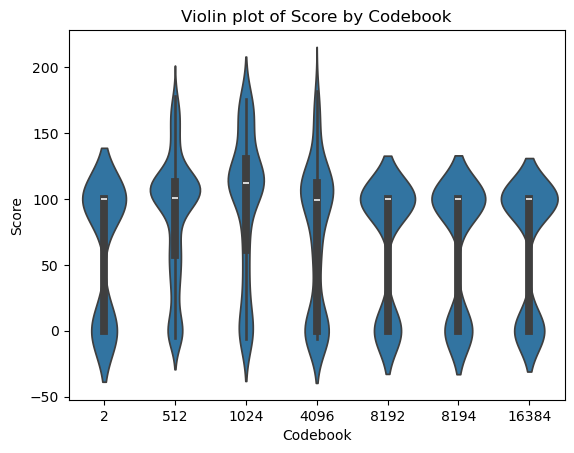

In [12]:

# Assuming your DataFrame is named df
# Replace 'codebook' and 'score' with the actual column names if they are different
sns.violinplot(x='codebook', y='scores', data=df)

plt.title('Violin plot of Score by Codebook')
plt.xlabel('Codebook')
plt.ylabel('Score')

plt.show()


/home/yxt/miniforge3/envs/vq-bet/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='scores', ylabel='codebook'>

/home/yxt/miniforge3/envs/vq-bet/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/yxt/miniforge3/envs/vq-bet/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


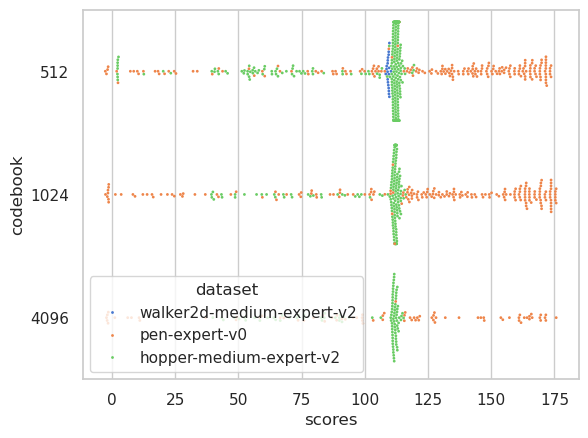

In [13]:
# Convert 'codebook' to string to treat it as a categorical variable
df_s = df.copy()
df_s = df_s[df_s['codebook'] <= 4096]
df_s = df_s[df_s['dataset'].str.contains('expert')]

df_s = df_s.sort_values(by='codebook')
df_s['codebook'] = df['codebook'].astype(str)

sns.set_theme(style="whitegrid", palette="muted")

# sns.swarmplot(data=df[df['codebook'].astype(int) <= 4096], 
sns.swarmplot(data=df_s, 
              x="scores", 
              y="codebook", 
              size=2,
              hue="dataset", 
              palette="muted")

<Axes: xlabel='scores', ylabel='codebook'>

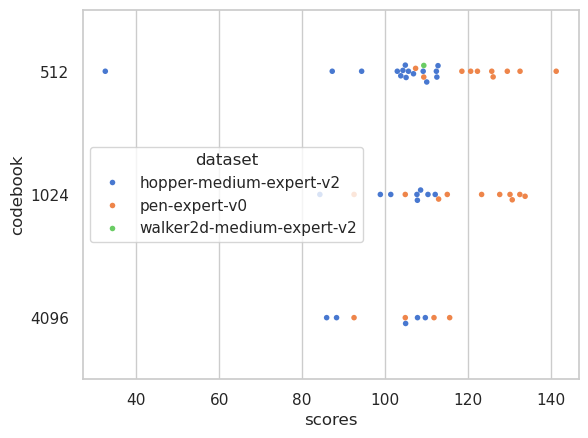

In [20]:

sns.swarmplot(data=df_s.groupby(['dataset', 'exp_name','codebook' ,'seed'])['scores'].mean().reset_index(),
              x="scores", 
              y="codebook", 
              size=4,
              hue="dataset", 
              palette="muted")

<Axes: xlabel='scores', ylabel='codebook'>

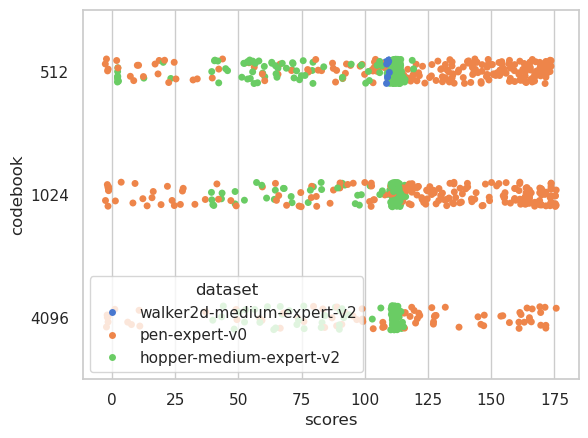

In [14]:
sns.stripplot(data=df_s, 
              x="scores", 
              y="codebook", 
              hue="dataset", 
              palette="muted", 
              jitter=True)

In [15]:
df[df['codebook'].isna()]

,dataset,exp_name,seed,rollout_time,scores,returns,first_value,first_search_value,discount_return,prediction_error,step,codebook,dimension,wt,tf
